In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
## Reading and uploading a dataset 
netflix_dataset=pd.read_csv("combined_data_1.txt",header=None, names=['Cust_id','Ratings'], usecols=[0,1])

In [3]:
netflix_dataset

,Cust_id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.dtypes

Cust_id     object
Ratings    float64
dtype: object

In [5]:
netflix_dataset.shape

(24058263, 2)

In [6]:
# get movie count by counting nan values
netflix_dataset.isnull().sum()

Cust_id       0
Ratings    4499
dtype: int64

In [7]:
#To find the distribution of different ratings in the datset
netflix_rating=netflix_dataset.groupby('Ratings')['Ratings'].agg(['count'])

In [8]:
netflix_rating

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
# get unique customer count
cust_unqiue=netflix_dataset['Cust_id'].nunique()
cust_unqiue-4499

470758

<Axes: ylabel='Ratings'>

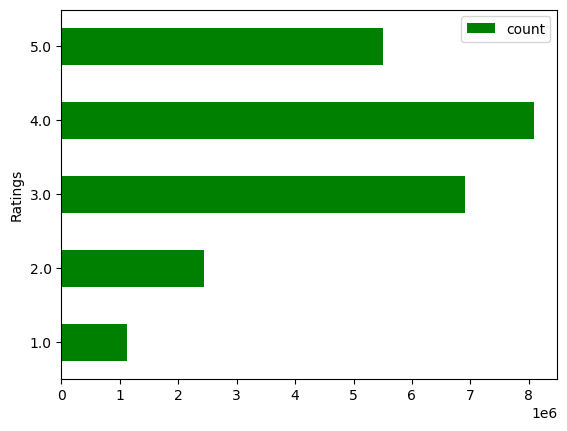

In [10]:
netflix_rating.plot(kind='barh',color='g')

## To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset¶

In [11]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan=pd.DataFrame(pd.isnull(netflix_dataset['Ratings']))

In [12]:
df_nan

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [13]:
# To store the index of all the rows containing 'nan' values
df_nan=df_nan[df_nan['Ratings']==True]

In [14]:
df_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [15]:
df_nan.shape

(4499, 1)

In [16]:
# To reset the index of the dataframe
df_nan=df_nan.reset_index()
df_nan

,index,Ratings
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [17]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [18]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [19]:
# np.full((row,col),filling value)
# Creating an empty arry for movie
# Creating a variable for movie id
movie_np=[]
movie_id=1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1,i-j-1),movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1

# The last record was getting missed , so we are trying to get last record to avoid any mismatch in dataset

last_record=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np,last_record)


In [20]:
print(len(movie_np))

24053764


In [21]:
netflix_dataset.shape

(24058263, 2)

In [22]:
df_nan.iloc[-1,0]

24057834

In [23]:
#24058263-24057834

In [24]:
movie_np[500:647]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [25]:
len(netflix_dataset)-len(movie_np)

4499

In [26]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Ratings'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_id']=netflix_dataset['Cust_id'].astype(int)

C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_6396\2397400558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)
C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_6396\2397400558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_id']=netflix_dataset['Cust_id'].astype(int)


In [27]:
netflix_dataset.head(10)

,Cust_id,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
7,124105,4.0,1
8,1248029,3.0,1
9,1842128,4.0,1
10,2238063,3.0,1


In [28]:
netflix_dataset.tail(10)

,Cust_id,Ratings,Movie_Id
24058253,272857,4.0,4499
24058254,185372,1.0,4499
24058255,2219917,3.0,4499
24058256,1796454,1.0,4499
24058257,2562830,4.0,4499
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [29]:
## Now we need to check the movie id's which are rated the most (count should be highest)
## The second we need to check customer also who rated the more number of movies
## For recommandation we will be keeping the treshold of 70%  

In [30]:
f=['mean','count']

In [31]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [32]:
dataset_movie_summary

Cust_id         Ratings      
                  mean count      mean count
Movie_Id                                    
1         1.249876e+06   547  3.749543   547
2         1.341926e+06   145  3.558621   145
3         1.324290e+06  2012  3.641153  2012
4         1.402854e+06   142  2.739437   142
5         1.302384e+06  1140  3.919298  1140
...                ...   ...       ...   ...
4495      1.321093e+06   614  3.478827   614
4496      1.332006e+06  9519  3.763000  9519
4497      1.330543e+06   714  2.715686   714
4498      1.262035e+06   269  2.464684   269
4499      1.270551e+06   428  2.614486   428

[4499 rows x 4 columns]

In [33]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Ratings'].agg(f)

In [34]:
dataset_movie_summary

,mean,count
Movie_Id,,
1,3.749543,547
2,3.558621,145
3,3.641153,2012
4,2.739437,142
5,3.919298,1140
...,...,...
4495,3.478827,614
4496,3.763000,9519
4497,2.715686,714


In [35]:
## Now we going the set threshold for a movie which is rated more than 70%, so whcihever moview is rated more than 1798 those movie only 
## we will consider for racommandation 
dataset_movie_summary['count'].quantile(0.7)

1798.6

In [36]:
## Setting a banchmark for the same 
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.75))

In [37]:
movie_benchmark

2538

In [38]:
## Now we will be droppingthose movies which are not coming under benchmark
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3374)

In [39]:
drop_movie_list

Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3374)

In [40]:
## Now we will do the same process how customer has rated and will condiser the 70% of the customer rating

In [41]:
dataset_cust_summary=netflix_dataset.groupby('Cust_id')['Ratings'].agg(f)
dataset_cust_summary

,mean,count
Cust_id,,
6,3.333333,153
7,4.066667,195
8,4.000000,21
10,3.346939,49
25,3.500000,4
...,...,...
2649404,4.083333,12
2649409,4.000000,10
2649421,5.000000,3


In [42]:
dataset_cust_summary.head(10)

,mean,count
Cust_id,,
6,3.333333,153
7,4.066667,195
8,4.000000,21
10,3.346939,49
25,3.500000,4
33,3.454545,11
42,3.944444,36
59,4.040816,49
79,3.507614,197


In [43]:
#dataset_cust_summary['count'].agg(f)

In [44]:
## setting a benchmark for customer 
## We will consider who has rated movies more than 52 times 
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [45]:
cust_benchmark

52.0

In [46]:
## We will drop the customers id who has rated less then 52 movies as per our benchmark

drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index

In [47]:
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_id', length=327300)

In [48]:
## We will exclude the netflix dataset to do a predition 


netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_id'].isin(drop_cust_list)]
print("The dataset after dropping/ trimming is ",netflix_dataset.shape)


The dataset after dropping/ trimming is  (16939081, 3)


In [49]:
!pip install scikit-surprise

In [50]:
# SVD: Singular Value Decomposition

In [51]:
df_title=pd.read_csv("movie_titles (1).csv", encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])

In [52]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [64]:
#Model Building for recommendation
import math
import seaborn as sns
from surprise import  Reader,Dataset,SVD
from surprise.model_selection import cross_validate


In [65]:
# Reader is used in reading the data in the particular format so as it can be instered into our SVD  model
reader=Reader()

In [66]:
data=Dataset.load_from_df(netflix_dataset[['Cust_id','Movie_Id','Ratings']][:100000],reader)

In [67]:
svd=SVD()

In [68]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0029  0.9898  0.9981  0.9991  0.9920  0.9964  0.0048  
MAE (testset)     0.8039  0.7939  0.8001  0.8031  0.7982  0.7999  0.0036  
Fit time          2.50    2.62    2.55    1.78    1.91    2.27    0.35    
Test time         0.34    0.27    0.26    0.19    0.48    0.31    0.10    


{'test_rmse': array([1.00292336, 0.98980754, 0.99812924, 0.99905307, 0.99204762]),
 'test_mae': array([0.80391082, 0.79394172, 0.80014958, 0.80308353, 0.79823395]),
 'fit_time': (2.502194881439209,
  2.6234798431396484,
  2.5458216667175293,
  1.7806499004364014,
  1.9112286567687988),
 'test_time': (0.34128332138061523,
  0.2669522762298584,
  0.25516366958618164,
  0.18631768226623535,
  0.48041868209838867)}

In [69]:
# SVD: Singular Value Decomposition
netflix_dataset.head(50)

,Cust_id,Ratings,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8
5117,588844,5.0,8
5119,1744889,1.0,8
5120,1216014,1.0,8
5122,2289614,3.0,8
5123,1777904,4.0,8


In [ ]:
data_1829027=netflix_dataset[(netflix_dataset['Cust_id']==1829027)] & (netflix_dataset['Ratings']==5)

In [ ]:
 data_1829027